In [1]:
import numpy as np

from numericke_metody.derint.derivate import (forward_difference, backward_difference,
                                              central_difference, sym_diff)
from numericke_metody.utils.visualizations import multiplot_vals

In [21]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(x)' 
#fce = 'exp(x)' 
#fce = 'exp(1/x)'
#fce = 'log(x)'

x0 = 1.5
h = .5

f_diff_sym = sym_diff(fce,x0)
f_diff_fd = forward_difference(fce,x0,h)
f_diff_bd = backward_difference(fce,x0,h)
f_diff_cd = central_difference(fce,x0,h)

print(f'Skutečná hodnota f\'(x):  {f_diff_sym:15.8f}')
print(f'Pravá diference:         {f_diff_fd:15.8f} (chyba: {np.abs(f_diff_fd - f_diff_sym):10.8f})')
print(f'Levá diference:          {f_diff_bd:15.8f} (chyba: {np.abs(f_diff_bd - f_diff_sym):10.8f})')
print(f'Centrální diference:     {f_diff_cd:15.8f} (chyba: {np.abs(f_diff_cd - f_diff_sym):10.8f})')

Skutečná hodnota f'(x):       0.07073720
Pravá diference:             -0.17639512 (chyba: 0.24713232)
Levá diference:               0.31204800 (chyba: 0.24131080)
Centrální diference:          0.06782644 (chyba: 0.00291076)


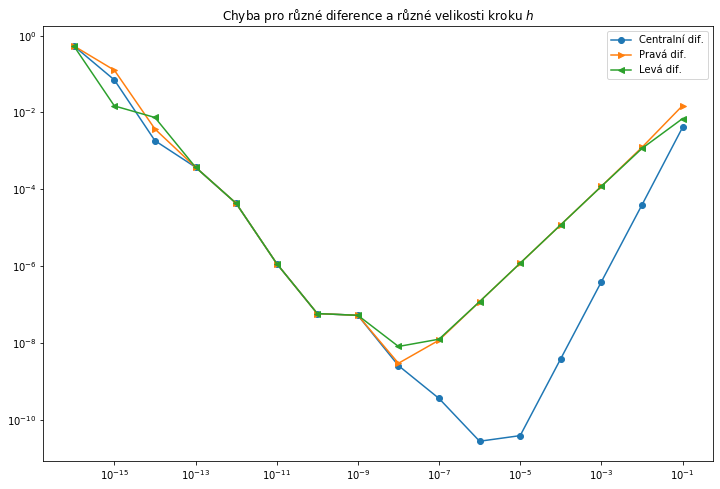

In [22]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(1/x)' 
#fce = 'exp(x)' 
#fce = 'exp(1/x)'
#fce = 'log(x)'

# pro jaké velikosti kroku budu derivovat
x0 = 1
hs = [1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-09,
     1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1]

f_diff_sym = sym_diff(fce,x0)

err_forward = [np.abs(forward_difference(fce,x0,h) - f_diff_sym) for h in hs]
err_backward = [np.abs(backward_difference(fce,x0,h) - f_diff_sym) for h in hs]
err_central = [np.abs(central_difference(fce,x0,h) - f_diff_sym) for h in hs]

vals = []

vals.append({'ys': err_central, 'line': 'o-', 'label': 'Centralní dif.'})
vals.append({'ys': err_forward, 'line': '>-', 'label': 'Pravá dif.'})
vals.append({'ys': err_backward, 'line': '<-', 'label': 'Levá dif.'})

multiplot_vals(hs,
               vals,
               'Chyba pro různé diference a různé velikosti kroku $h$',
               xscale='log',
               yscale='log')